# K-Means clustering : Customer Segmentation
🌰
* Generated with file dataforkmeans_v2.csv
* Please refer to the readme.md in the data folder if you need more info on the csv file used in this note book.

In [7]:
import numpy as np
# from scipy.cluster.hierarchy import dendrogram, linkage  
# from scipy.spatial.distance import euclidean
# from scipy.spatial.distance import pdist,squareform
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import seaborn as sns
sns.set()
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
# from collections import defaultdict
# from sklearn.metrics import silhouette_score
# from itertools import combinations
pd.set_option('display.max_columns', None)

In [8]:
data = pd.read_csv('../data/dataforkmeans_v1.csv')

In [3]:
# customerID = data.UniqueVisitID

In [15]:
data = data.set_index('UniqueVisitID')
data = data.drop('VisitDate', axis=1)

###  ???Generate new feature 'b_effective' (banner effective)and droped feature ClickedBanner, AddedtoBasket, (Purchased)?
Here is my thought: the goal of this project is to analyze the effect of the banner, and since each uniquevisitid is unique. Therefore I made an assumption that :if some one clicked the banner and then added this item to basket or after clicking this banner the consumer purchased this item, the banner is effective to this consumer. 

In [12]:
%%time
data = data.reset_index()
data['b_effective'] = 0
for i in range(len(data.index)):
    if data['ClickedBanner'][i] == 1 and (data['AddedToBasket'][i] ==1 or data['Purchased'][i]==1):
        data['b_effective'][i] =1

data=data.drop(['AddedToBasket','ClickedBanner','Purchased'],axis =1)

CPU times: user 5.68 s, sys: 474 ms, total: 6.16 s
Wall time: 5.74 s


In [13]:
data.head()


,UniqueVisitID,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,PirorVisitPur,NewVisit,PirorVisit,PlatformWeb,PlatformPhone,ThroughAds,ThroughEmail,ThroughWS,Chrome,Safari,MicsEdge,MacX,iOS,Windows,Chrome OS,Android,Other/Unknown,Linux,Sex_Female,Sex_Male,IR_100to250k,IR_50to100k,IR_Under50k,Eastern,West_Coast,Mid_West,South_West,Other,b_effective
0,2014237601010030,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
1,6875972920873110,1,1,8,1,430,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
2,43601232830137300,1,0,26,1,2785,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
3,92348156703921600,0,0,11,0,7143,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
4,116514741139866000,1,0,78,0,5813,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0


In [ ]:
data.columns

In [16]:
data.shape

(369393, 34)

In [17]:
data.to_csv('../data/dataforkmeans_v2.csv',index = False)

### Heat map

In [ ]:
# ax = sns.heatmap(data)

### K-means models generation
kmeans_x stands for k-means algorithm with k=x (x clusters)

### Elbow Method 

https://www.quora.com/How-can-we-choose-a-good-K-for-K-means-clustering

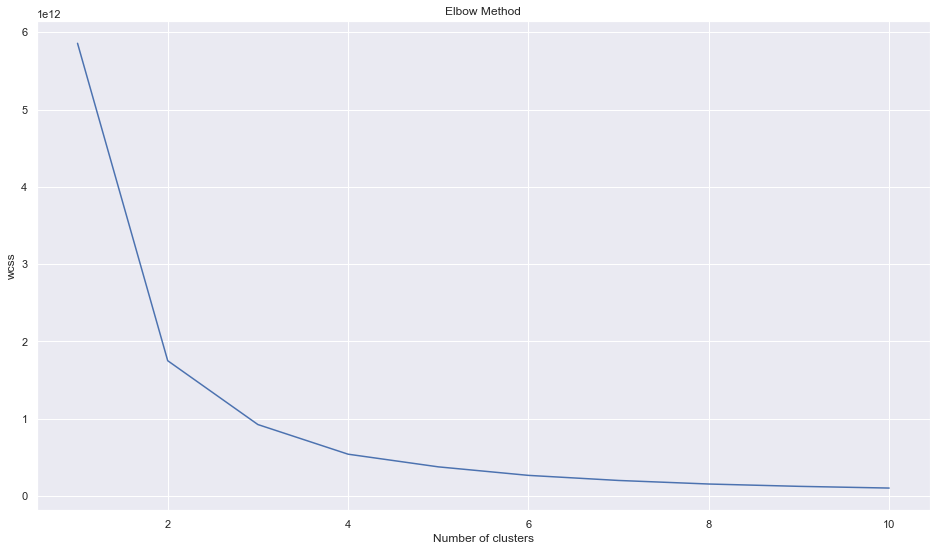

CPU times: user 3min 58s, sys: 23.3 s, total: 4min 21s
Wall time: 3min 55s


In [18]:
%%time
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=3000, precompute_distances='auto',
                n_init=10,copy_x=True,n_jobs= -1)
    km.fit(data)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

### Based on the plot above, the elbow is 2, I would try k = 2 & k=3 & k=4

In [19]:
kmeans_2 = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300000,
    n_clusters=2, n_jobs= -1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
kmeans_3 = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300000,
    n_clusters=3, n_jobs= -1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
kmeans_4 = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300000,
    n_clusters=4, n_jobs= -1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
# data=data.drop('cluster',axis=1)

## K = 2

In [20]:
data2 = data
y_2 = kmeans_2.fit_predict(data2)

data2['cluster'] = y_2
data2_summary = data2.groupby('cluster').sum()
data2_summary_mean = data2.groupby('cluster').mean()

In [21]:
data2_summary

,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,PirorVisitPur,NewVisit,PirorVisit,PlatformWeb,PlatformPhone,ThroughAds,ThroughEmail,ThroughWS,Chrome,Safari,MicsEdge,MacX,iOS,Windows,Chrome OS,Android,Other/Unknown,Linux,Sex_Female,Sex_Male,IR_100to250k,IR_50to100k,IR_Under50k,Eastern,West_Coast,Mid_West,South_West,Other,b_effective
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,193614,54351,4800877,139975,312803206,298190,5680,25140,177162,151848,91191,101424,136395,138610,171197,19203,47557,144041,81662,2650,52884,38,178,267444,61566,128916,123588,60229,191444,42983,55285,29376,667,3918
1,37116,12226,2070525,26307,469883633,36153,663,3567,21066,19317,9806,16122,14455,16217,22637,1529,7168,18687,9032,309,5175,0,12,32887,7496,16525,15198,7275,23014,5603,6758,3938,86,1538


In [22]:
data2_summary_mean

,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,PirorVisitPur,NewVisit,PirorVisit,PlatformWeb,PlatformPhone,ThroughAds,ThroughEmail,ThroughWS,Chrome,Safari,MicsEdge,MacX,iOS,Windows,Chrome OS,Android,Other/Unknown,Linux,Sex_Female,Sex_Male,IR_100to250k,IR_50to100k,IR_Under50k,Eastern,West_Coast,Mid_West,South_West,Other,b_effective
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.588475,0.165196,14.591888,0.425443,950.740725,0.906325,0.017264,0.076411,0.538470,0.461530,0.277168,0.308270,0.414562,0.421294,0.520340,0.058366,0.144546,0.437801,0.248205,0.008054,0.160737,0.000115,0.000541,0.812875,0.187125,0.391830,0.375636,0.183061,0.581879,0.130643,0.168034,0.089286,0.002027,0.011908
1,0.919100,0.302751,51.272194,0.651437,11635.679197,0.895253,0.016418,0.088329,0.521655,0.478345,0.242825,0.399227,0.357948,0.401580,0.560558,0.037862,0.177500,0.462744,0.223658,0.007652,0.128148,0.000000,0.000297,0.814377,0.185623,0.409207,0.376346,0.180150,0.569893,0.138747,0.167348,0.097516,0.002130,0.038085


## k = 3

In [24]:
data=data.drop('cluster',axis=1)
data3 = data
y_3 = kmeans_3.fit_predict(data3)
data3['cluster'] = y_3
data3_summary = data3.groupby('cluster').sum()

data3_summary_mean = data3.groupby('cluster').mean()

In [25]:
data3_summary

,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,PirorVisitPur,NewVisit,PirorVisit,PlatformWeb,PlatformPhone,ThroughAds,ThroughEmail,ThroughWS,Chrome,Safari,MicsEdge,MacX,iOS,Windows,Chrome OS,Android,Other/Unknown,Linux,Sex_Female,Sex_Male,IR_100to250k,IR_50to100k,IR_Under50k,Eastern,West_Coast,Mid_West,South_West,Other,b_effective
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,179077,49923,4155598,130003,228993720,284025,5387,23641,168280,144773,87201,95658,130194,131954,162618,18481,44631,137097,77809,2523,50784,38,171,254493,58560,122474,117631,57308,182250,40791,52626,27845,642,3418
1,9255,3410,774379,6933,182303915,8517,175,874,5014,4552,2137,4003,3426,3875,5319,372,1699,4430,2169,77,1188,0,3,7783,1783,3905,3586,1746,5426,1358,1597,939,17,538
2,42398,13244,1941425,29346,371389204,41801,781,4192,24934,21840,11659,17885,17230,18998,25897,1879,8395,21201,10716,359,6087,0,16,38055,8719,19062,17569,8450,26782,6437,7820,4530,94,1500


In [26]:
data3_summary_mean

,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,PirorVisitPur,NewVisit,PirorVisit,PlatformWeb,PlatformPhone,ThroughAds,ThroughEmail,ThroughWS,Chrome,Safari,MicsEdge,MacX,iOS,Windows,Chrome OS,Android,Other/Unknown,Linux,Sex_Female,Sex_Male,IR_100to250k,IR_50to100k,IR_Under50k,Eastern,West_Coast,Mid_West,South_West,Other,b_effective
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.572034,0.159471,13.274423,0.415275,731.485467,0.907274,0.017208,0.075518,0.537545,0.462455,0.278550,0.305565,0.415885,0.421507,0.519458,0.059035,0.142567,0.437935,0.248549,0.008059,0.162222,0.000121,0.000546,0.812939,0.187061,0.391224,0.375754,0.183062,0.582170,0.130301,0.168106,0.088947,0.002051,0.010918
1,0.967489,0.356471,80.951181,0.724754,19057.486410,0.890341,0.018294,0.091365,0.524148,0.475852,0.223395,0.418461,0.358143,0.405080,0.556032,0.038888,0.177608,0.463098,0.226741,0.008049,0.124190,0.000000,0.000314,0.813611,0.186389,0.408217,0.374869,0.182521,0.567217,0.141961,0.166945,0.098160,0.001777,0.056241
2,0.906444,0.283149,41.506499,0.627400,7940.077907,0.893680,0.016697,0.089622,0.533074,0.466926,0.249262,0.382371,0.368367,0.406166,0.553662,0.040172,0.179480,0.453265,0.229102,0.007675,0.130136,0.000000,0.000342,0.813593,0.186407,0.407534,0.375615,0.180656,0.572583,0.137619,0.167187,0.096849,0.002010,0.032069


## k =4

In [27]:
data=data.drop('cluster',axis=1)
data4 = data
data4['cluster'] = kmeans_4.fit_predict(data4)
data4_summary = data4.groupby('cluster').sum()
data4_summary_mean = data4.groupby('cluster').mean()

In [28]:
data4_summary

,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,PirorVisitPur,NewVisit,PirorVisit,PlatformWeb,PlatformPhone,ThroughAds,ThroughEmail,ThroughWS,Chrome,Safari,MicsEdge,MacX,iOS,Windows,Chrome OS,Android,Other/Unknown,Linux,Sex_Female,Sex_Male,IR_100to250k,IR_50to100k,IR_Under50k,Eastern,West_Coast,Mid_West,South_West,Other,b_effective
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,157244,43327,3277811,115172,148068461,262871,4872,21397,154745,134395,81173,87170,120797,121689,150154,17297,40293,127049,71875,2312,47417,38,156,235081,54059,112861,108712,52878,168465,37503,48668,25629,590,2667
1,23724,7665,1201064,16621,287235249,23202,407,2292,13597,12304,6345,10337,9219,10357,14566,978,4622,11965,5804,210,3291,0,9,21052,4849,10790,9643,4593,14769,3561,4318,2547,53,892
2,44722,13642,1900423,30630,230368164,43635,974,4543,27266,21886,12325,17817,19010,20647,26232,2273,8940,21257,11851,391,6688,0,25,39959,9193,19743,18430,9055,28285,6751,8195,4627,101,1563
3,5040,1943,492104,3859,117014965,4635,90,475,2620,2580,1154,2222,1824,2134,2882,184,870,2457,1164,46,663,0,0,4239,961,2047,2001,978,2939,771,862,511,9,334


In [29]:
data4_summary_mean

,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,PirorVisitPur,NewVisit,PirorVisit,PlatformWeb,PlatformPhone,ThroughAds,ThroughEmail,ThroughWS,Chrome,Safari,MicsEdge,MacX,iOS,Windows,Chrome OS,Android,Other/Unknown,Linux,Sex_Female,Sex_Male,IR_100to250k,IR_50to100k,IR_Under50k,Eastern,West_Coast,Mid_West,South_West,Other,b_effective
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.543833,0.149848,11.336415,0.398326,512.099540,0.909148,0.016850,0.074002,0.535191,0.464809,0.280739,0.301480,0.417780,0.420865,0.519312,0.059822,0.139355,0.439403,0.248582,0.007996,0.163993,0.000131,0.000540,0.813035,0.186965,0.390333,0.375984,0.182880,0.582642,0.129705,0.168320,0.088639,0.002041,0.009224
1,0.915949,0.295935,46.371337,0.641713,11089.735879,0.895796,0.015714,0.088491,0.524960,0.475040,0.244971,0.399097,0.355932,0.399869,0.562372,0.037759,0.178449,0.461951,0.224084,0.008108,0.127061,0.000000,0.000347,0.812787,0.187213,0.416586,0.372302,0.177329,0.570210,0.137485,0.166712,0.098336,0.002046,0.034439
2,0.909871,0.277547,38.664205,0.623169,4686.852295,0.887756,0.019816,0.092428,0.554728,0.445272,0.250753,0.362488,0.386759,0.420064,0.533691,0.046244,0.181885,0.432475,0.241109,0.007955,0.136068,0.000000,0.000509,0.812968,0.187032,0.401672,0.374959,0.184224,0.575460,0.137349,0.166728,0.094137,0.002055,0.031799
3,0.969231,0.373654,94.635385,0.742115,22502.877885,0.891346,0.017308,0.091346,0.503846,0.496154,0.221923,0.427308,0.350769,0.410385,0.554231,0.035385,0.167308,0.472500,0.223846,0.008846,0.127500,0.000000,0.000000,0.815192,0.184808,0.393654,0.384808,0.188077,0.565192,0.148269,0.165769,0.098269,0.001731,0.064231
